In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import plotly as px
import plotly.graph_objects as go


import plotly.express as px



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('/content/drive/MyDrive/CODING/train.csv',delimiter=',')

data.sample(4)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
43097,43097,M,1.4625,1.175,0.3750,31.581343,13.508537,6.109317,7.512618,10
25494,25494,F,1.6375,1.225,0.4375,38.512796,18.129505,8.334753,10.347568,11
27606,27606,M,1.6125,1.200,0.4000,34.614739,16.499409,7.271647,8.986792,9
4875,4875,M,1.6125,1.225,0.4625,37.407165,17.704263,9.185238,9.497082,8


In [6]:
data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [7]:
data.nunique()

id                74051
Sex                   3
Length              144
Diameter            122
Height               65
Weight             3096
Shucked Weight     1766
Viscera Weight      967
Shell Weight       1048
Age                  28
dtype: int64

In [8]:
most_using_platform=data["Diameter"].value_counts(ascending=False)
print(most_using_platform.values[:5])
print(most_using_platform.index[:5])

[3131 2467 2322 2153 2132]
Float64Index([1.125, 1.1875, 1.2125, 1.0, 1.175], dtype='float64')


In [9]:
most_diameter=data["Diameter"].value_counts(ascending=False)

colors=['#8BC34A','#D4E157','#FFB300','#FF7043',"#E43D3D","#A1A1A1"]

donut=go.Pie(values = most_diameter.values[:5] , labels=most_diameter.index[:5] , marker=dict(colors=colors), textinfo='label+percent' , hole=0.6 , pull= [0,0,0,0,0,0.1] )

layout=go.Layout(title=dict(text='Most 5 Diameter ', x=.50,y=.90,font_size=30))

fig=go.Figure(data=donut,layout=layout)

fig.show()

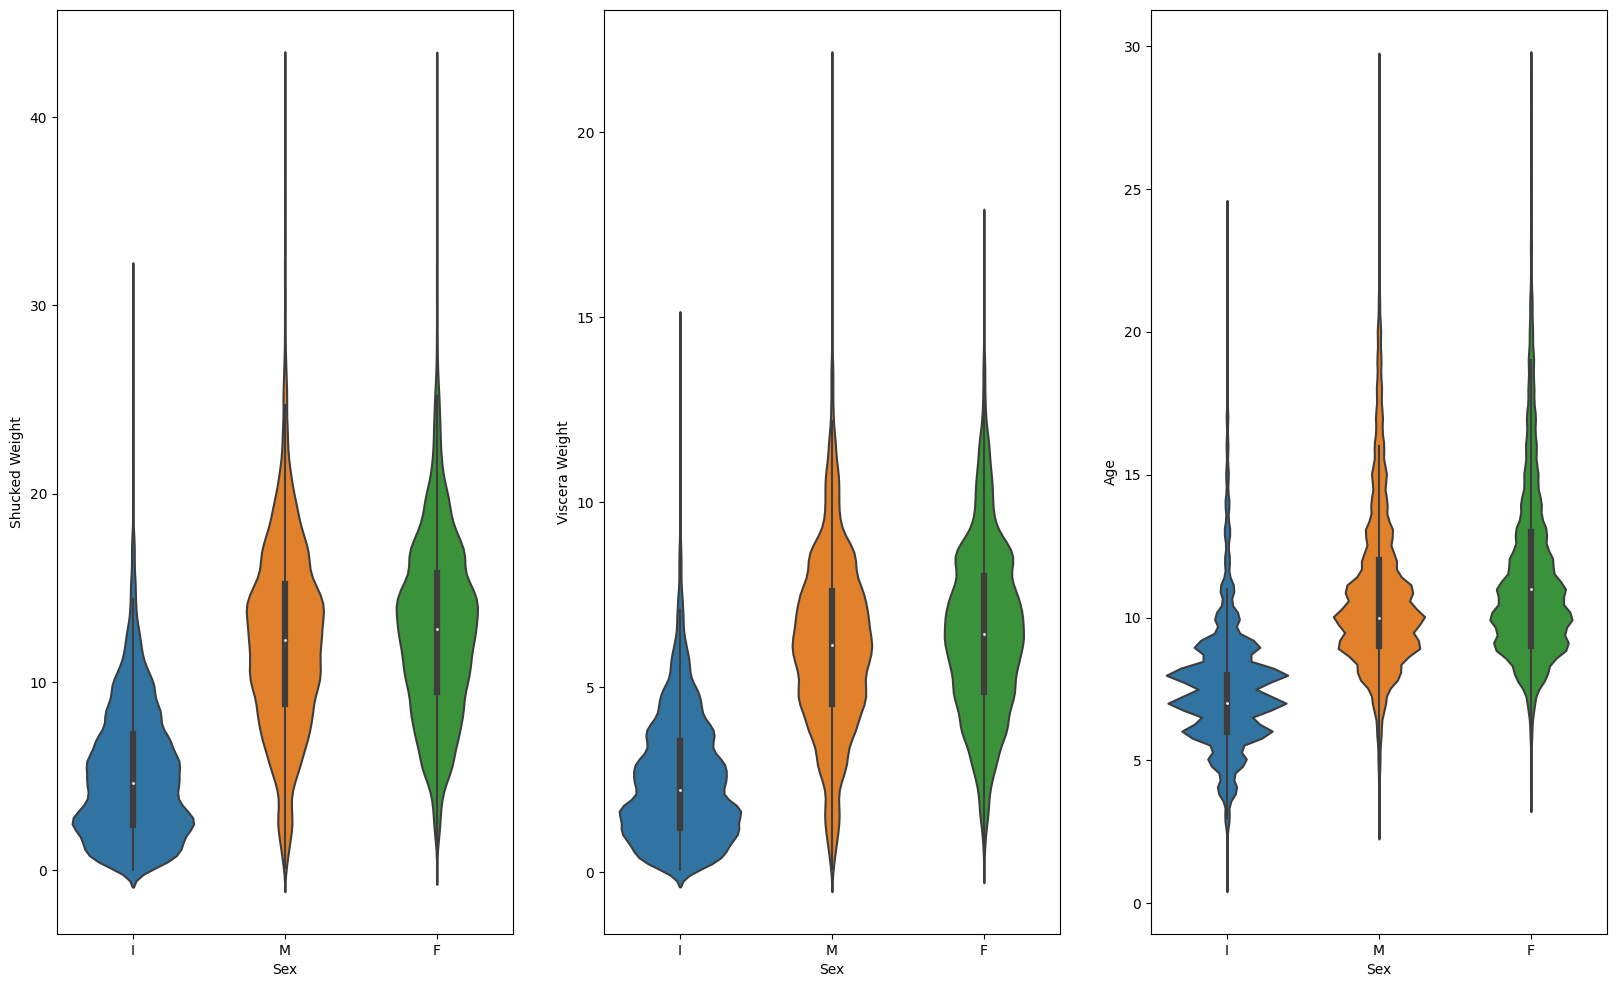

In [10]:
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.violinplot(x='Sex',y='Shucked Weight' , data=data)

plt.subplot(1,3,2)
sns.violinplot(x='Sex',y='Viscera Weight' , data=data )

plt.subplot(1,3,3)
sns.violinplot(x='Sex',y='Age' , data=data )


plt.show()

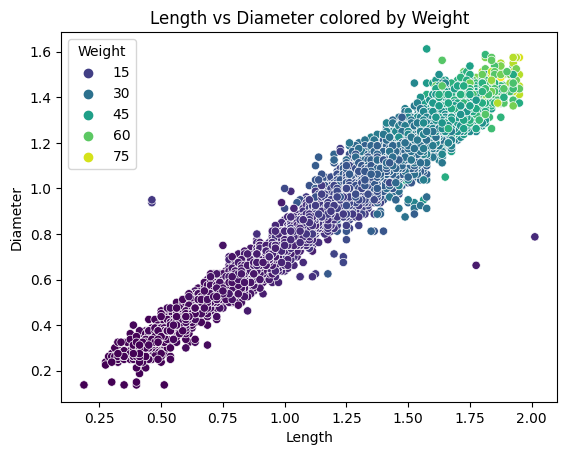

In [11]:
sns.scatterplot(x='Length', y='Diameter', hue='Weight', data=data, palette='viridis')
plt.title('Length vs Diameter colored by Weight')
plt.show()

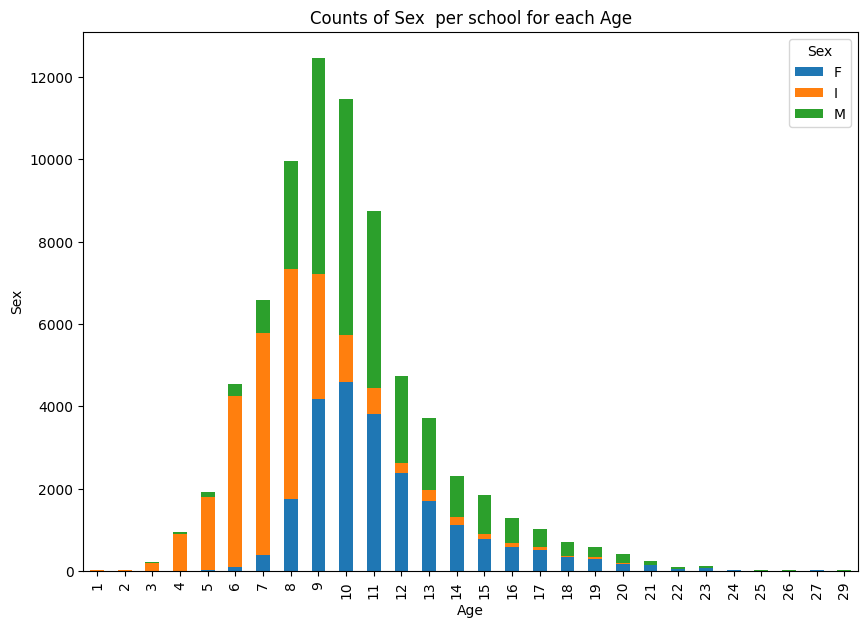

In [12]:
order=data.groupby('Sex')["Age"].value_counts()

order_df=order.reset_index(name='count')


pivot_df = order_df.pivot(index='Age', columns='Sex', values='count')

# Replace NaNs with 0
pivot_df = pivot_df.fillna(0)

# Create the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Counts of Sex  per school for each Age')
plt.ylabel('Sex')
plt.xlabel('Age')

plt.show()

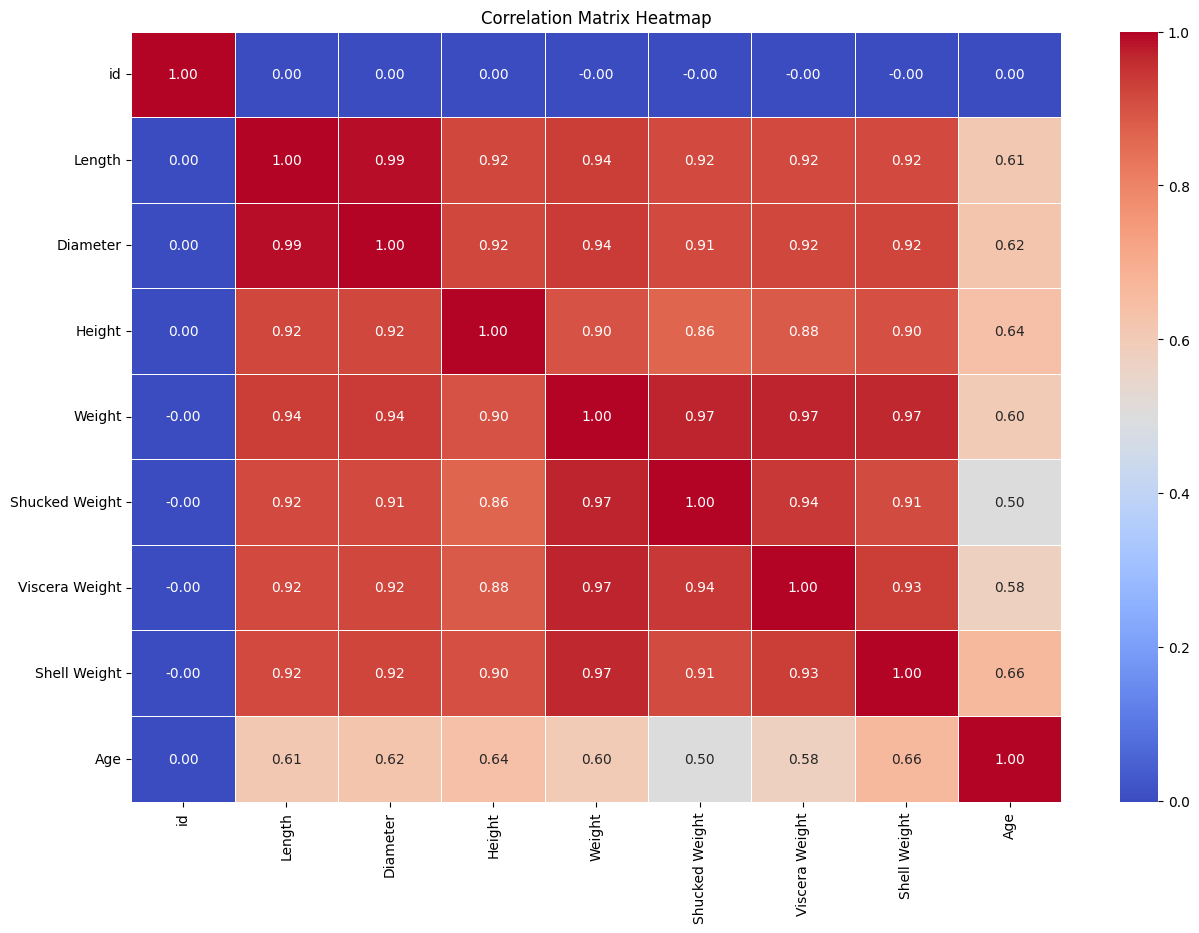

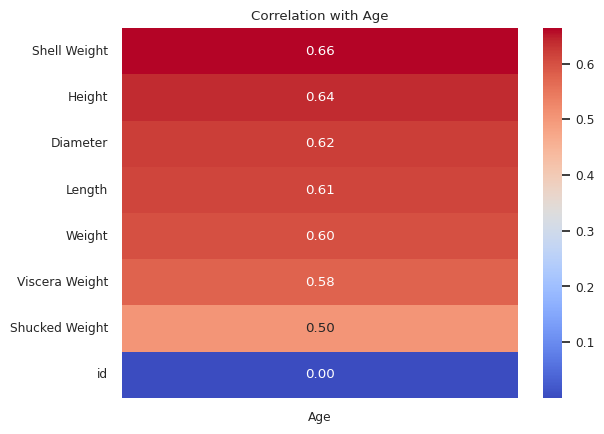

In [13]:
# Compute the correlation matrix
data2=data.drop(columns="Sex",axis=1)
correlation_matrix = data2.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Graph II
# Create a heatmap of the correlations with the target column
corr = data2.corr()
target_corr = corr['Age'].drop('Age')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Age')
plt.show()

In [14]:
#Changing the features

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing

def new_features(df):

    condition1 = df['Weight']<(df['Shell Weight']+df['Viscera Weight']+df['Shucked Weight'])
    new_value = df['Shell Weight']+df['Viscera Weight']+df['Shucked Weight']
    df['Weight'] = np.where(condition1,new_value,df['Weight'])

    df["Area_Crab"]=df["Length"]*df["Diameter"]
    df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
    df ["D1"] = df["Height"] * df["Diameter"]
    df ["D2"] = df["Height"] * df["Length"]
    df ["D3"] = df["Diameter"] * df["Length"]

    df ["Volume"] = df["Weight"] / (df["Diameter"]+0.000000001)
    df["total_weight"] = df["Shell Weight"] + df["Viscera Weight"] + df["Shucked Weight"]
    df['Shell Percentage'] = df['Shell Weight'] / df['Weight']
    df['Meat Percentage'] = df['Shucked Weight'] / df['Weight']
    df['Viscera Percentage'] = df['Viscera Weight'] / df['Weight']
    df['Shell Surface Area'] = (df['Diameter'] * df['Length'] * 2) * (
            df['Diameter'] * df['Height'] * 2) * (
                                       df['Length'] * df['Height'] * 2)

    df['L2'] = df['Length']**2
    df['H2'] = df['Height']**2
    df['W2'] = df['Weight']**2
    df['SW2'] = df['Shell Weight']**2

    df['Meat Yield'] = df['Shucked Weight'] / (df['Weight'] + df['Shell Weight'])
    df['Shell Ratio'] = df['Shell Weight'] / df['Weight']
    df['Weight_to_Shucked_Weight'] = df['Weight'] / df['Shucked Weight']
    df['Viscera Ratio'] = df['Viscera Weight'] / df['Weight']


    allcols = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Meat Yield','Shell Ratio',
          'Weight_to_Shucked_Weight', 'Viscera Ratio']

    for i in allcols:
        df[i+' _log'] = (df[i]+1).transform(np.log)



    transform = PowerTransformer(method='yeo-johnson')
    for i in allcols:
        df[i+' +y_j'] = transform.fit_transform(df[[i]])

#########################################################
    transform = QuantileTransformer(n_quantiles=10, random_state=0)
    for i in allcols:
        df[i+' +q_t'] = transform.fit_transform(df[[i]])

 #########################################################
    for i in allcols:
        df[i+' +sqrt'] = (df[i]+1).transform(np.sqrt)


    #from notebook
    #https://www.kaggle.com/code/klyushnik/ensemble-learning-regression
    #thanks



    return df


dataset_new=new_features(data)

In [15]:
dataset_new.head(6)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,...,Diameter +sqrt,Height +sqrt,Weight +sqrt,Shucked Weight +sqrt,Viscera Weight +sqrt,Shell Weight +sqrt,Meat Yield +sqrt,Shell Ratio +sqrt,Weight_to_Shucked_Weight +sqrt,Viscera Ratio +sqrt
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,...,1.474788,1.172604,5.474778,3.705256,2.765494,3.057602,1.158040,1.134972,1.810019,1.108807
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,...,1.350926,1.129159,3.379118,2.349839,1.823365,2.098080,1.152033,1.151751,1.817712,1.105952
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,...,1.453444,1.172604,5.077151,3.512805,2.560567,2.768056,1.166484,1.126445,1.784657,1.106461
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,...,1.553222,1.224745,7.187528,4.621141,3.462923,3.999611,1.144560,1.138432,1.867848,1.103164
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,...,1.418626,1.156503,4.928399,3.602452,2.346821,2.636929,1.187265,1.120549,1.715919,1.092496
5,5,M,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10,...,1.474788,1.188486,5.463114,3.795960,2.791004,2.989625,1.168138,1.129241,1.775151,1.111477


In [16]:
def convertoSex(x):
    if x=="I":
        return 0
    elif x=="M":
        return 1
    else:
        return 2

dataset_new["Sex"]=dataset_new["Sex"].apply(convertoSex)

Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset_new.drop('Age', axis=1)  # 'Age' sütununu çıkararak bağımsız değişkenleri alın
y = dataset_new['Age']  # 'Age' sütununu bağımlı değişken olarak ayırın


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Sonuçları gösterin
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (37025, 71)
X_test shape: (37026, 71)
y_train shape: (37025,)
y_test shape: (37026,)


In [18]:
from sklearn.svm import SVR
model=SVR(kernel="rbf",gamma=0.01,C=8)
model.fit(X_train,y_train)

SVR(C=8, gamma=0.01)

In [19]:
y_pred=model.predict(X_test)

In [20]:
# #GridSearch Cv



# from sklearn.model_selection import GridSearchCV

# p=[{'C':[1,4,8],"kernel":['linear',"rbf","sigmoid"]}, # bi bu denenecek(case1)

#     {"gamma":[0.1,1,2,5],"kernel":['linear',"rbf","sigmoid"]}  ] #sonra ayrıca bu denenecek.(case2)     ] #parametreleri bu şekilde deniyor


# gs=GridSearchCV(estimator=model,param_grid=p,scoring="accuracy",cv=10,n_jobs=-1)

# """
# GS parametreleri

# estimator: sınıflandırma algoritma( neyi optimize etmek istediğimiz)
# param_grid: parametreler(p)
# scoring: örn: accurary (neye göre skorlanacak)
# cv: kaç katlamalı olacak.
# n_jobs: aynı anda çalışacak iş
# """

# grid_search=gs.fit(X_train,y_train) # üstüne giydirilmiş bir kılıf gibi eğitiyoruz. ÜST AKIL GİBİ ÇALIŞIP fit etmeye çalışıcaz

# BestScore=grid_search.best_score_ # bu bize en yüksek accuracy döndürecek.

# BestParameters=grid_search.best_params_ #En iyi parametreleri döndürecektir.

# BestScore

In [21]:
#MSE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test, y_pred=y_pred)

2.1927969730440355

In [22]:
#R2 skoru
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.07613679120770334

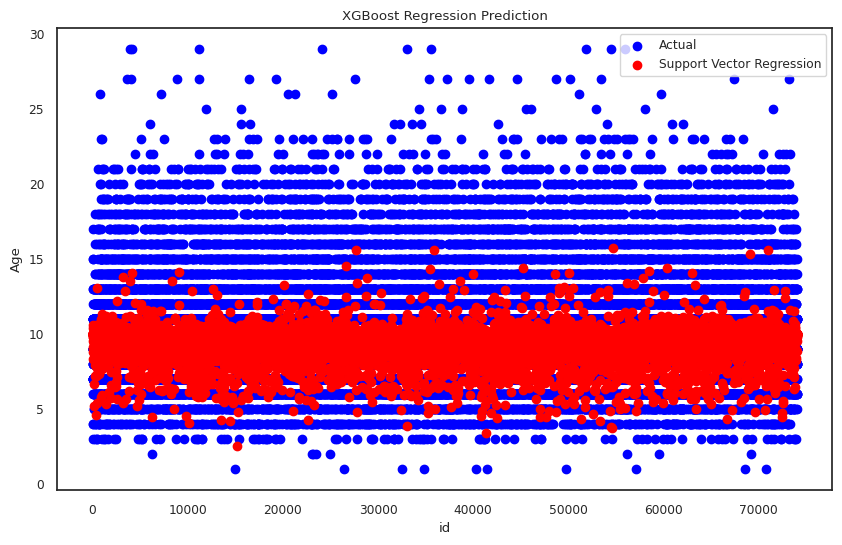

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Actual')
plt.scatter(X_test.index, y_pred, color='red', label='Support Vector Regression')
plt.xlabel('id')
plt.ylabel('Age')
plt.title('XGBoost Regression Prediction')
plt.legend()
plt.show()


## BETTER MODEL
### CATBOOST

In [24]:
!pip install catboost

In [25]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

cat_params = {'depth': 6, 'iterations': 2500, 'learning_rate': 0.05}
model = CatBoostRegressor(**cat_params,objective = 'MAE', verbose = False, loss_function = 'MAE')
model.fit(X_train, y_train)
y_pred_cb = model.predict(X_test)
y_pred_cb

array([ 4.60244588, 12.76677234,  8.04268117, ...,  8.88399514,
       10.72544809,  4.93654616])

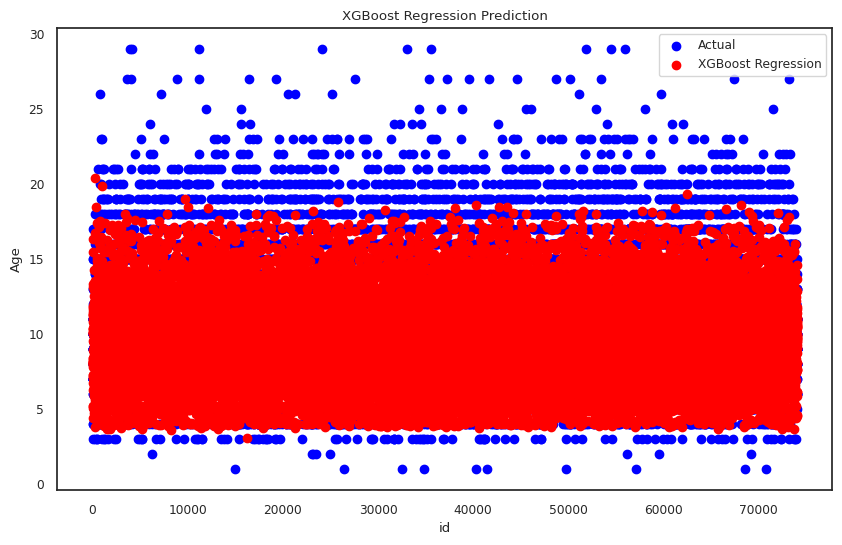

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Actual')
plt.scatter(X_test.index, y_pred_cb, color='red', label='XGBoost Regression')
plt.xlabel('id')
plt.ylabel('Age')
plt.title('XGBoost Regression Prediction')
plt.legend()
plt.show()

In [27]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test, y_pred=y_pred_cb)

1.3615501726324277

In [28]:
#R2 skoru
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_cb)

0.5664632009719948